In [1]:
import pandas as pd        #read,explore & clean data
import numpy as np         # data manipulation
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # data visualization

In [16]:
#read the data with pandas
dataframe=pd.read_csv("malaria_africa_cleaned.csv")

In [17]:
#Explore, clean and preprocess the data
#find the number of rows and columns in the dataframe
dataframe.shape

(344, 14)

In [18]:
#get the first n rows in the dataframe
dataframe.head(n=5)

,Country,Year,No. of cases_estimated,No. of deaths_estimated,No. of cases_median,No. of cases_min,No. of cases_max,No. of deaths_median,No. of deaths_min,No. of deaths_max,WHO Region,No. of cases_reported,No. of deaths_reported,No. of cases
0,Algeria,2017,0,0,0,0.0,0.0,0,0.0,0.0,Africa,0.0,0.0,0.00
1,Angola,2017,4615605[3106000-6661000],13316[9970-16600],4615605,3106000.0,6661000.0,13316,9970.0,16600.0,Africa,3874892.0,13967.0,228.91
2,Benin,2017,4111699[2774000-6552000],7328[5740-8920],4111699,2774000.0,6552000.0,7328,5740.0,8920.0,Africa,1573163.0,2182.0,399.56
3,Botswana,2017,2989[2300-4200],7[0-20],2989,2300.0,4200.0,7,0.0,20.0,Africa,1900.0,17.0,2.05
4,Burkina Faso,2017,7907562[5645000-11330000],27791[25100-30500],7907562,5645000.0,11330000.0,27791,25100.0,30500.0,Africa,10225459.0,4144.0,399.94


In [19]:
# list the column names
dataframe.columns

Index(['Country', 'Year', 'No. of cases_estimated', 'No. of deaths_estimated',
       'No. of cases_median', 'No. of cases_min', 'No. of cases_max',
       'No. of deaths_median', 'No. of deaths_min', 'No. of deaths_max',
       'WHO Region', 'No. of cases_reported', 'No. of deaths_reported',
       'No. of cases'],
      dtype='object')

In [20]:
#obtain some information about the data 
#i.e. columns,datatypes,missing values,etc
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  344 non-null    object 
 1   Year                     344 non-null    int64  
 2   No. of cases_estimated   344 non-null    object 
 3   No. of deaths_estimated  344 non-null    object 
 4   No. of cases_median      344 non-null    int64  
 5   No. of cases_min         344 non-null    float64
 6   No. of cases_max         344 non-null    float64
 7   No. of deaths_median     344 non-null    int64  
 8   No. of deaths_min        344 non-null    float64
 9   No. of deaths_max        344 non-null    float64
 10  WHO Region               344 non-null    object 
 11  No. of cases_reported    344 non-null    float64
 12  No. of deaths_reported   344 non-null    float64
 13  No. of cases             344 non-null    float64
dtypes: float64(7), int64(3), o

In [22]:
#Check the mising data. We are interested in how many missing data are present in each column
dataframe.isnull().sum()

Country                    0
Year                       0
No. of cases_estimated     0
No. of deaths_estimated    0
No. of cases_median        0
No. of cases_min           0
No. of cases_max           0
No. of deaths_median       0
No. of deaths_min          0
No. of deaths_max          0
WHO Region                 0
No. of cases_reported      0
No. of deaths_reported     0
No. of cases               0
dtype: int64

In [76]:
# Define malaria severity levels based on quantiles
dataframe['malaria_severity'] = pd.qcut(dataframe['No. of cases'], q=3, labels=['low', 'medium', 'high'])

In [77]:
dataframe['malaria_severity'].unique()

['low', 'medium', 'high']
Categories (3, object): ['low' < 'medium' < 'high']

In [79]:
labels=pd.Categorical(dataframe['malaria_severity'])
labels

['low', 'medium', 'high', 'low', 'high', ..., 'medium', 'high', 'medium', 'medium', 'medium']
Length: 344
Categories (3, object): ['low' < 'medium' < 'high']

In [80]:
dataframe.head()

,Country,Year,No. of cases_estimated,No. of deaths_estimated,No. of cases_median,No. of cases_min,No. of cases_max,No. of deaths_median,No. of deaths_min,No. of deaths_max,WHO Region,No. of cases_reported,No. of deaths_reported,No. of cases,malaria_severity
0,Algeria,2017,0,0,0,0.0,0.0,0,0.0,0.0,Africa,0.0,0.0,0.00,low
1,Angola,2017,4615605[3106000-6661000],13316[9970-16600],4615605,3106000.0,6661000.0,13316,9970.0,16600.0,Africa,3874892.0,13967.0,228.91,medium
2,Benin,2017,4111699[2774000-6552000],7328[5740-8920],4111699,2774000.0,6552000.0,7328,5740.0,8920.0,Africa,1573163.0,2182.0,399.56,high
3,Botswana,2017,2989[2300-4200],7[0-20],2989,2300.0,4200.0,7,0.0,20.0,Africa,1900.0,17.0,2.05,low
4,Burkina Faso,2017,7907562[5645000-11330000],27791[25100-30500],7907562,5645000.0,11330000.0,27791,25100.0,30500.0,Africa,10225459.0,4144.0,399.94,high


In [81]:
#class distribution
dataframe['malaria_severity'].value_counts()

malaria_severity
low       115
high      115
medium    114
Name: count, dtype: int64

In [82]:
#check the correlation for the features
#First, select only numeric columns for correlation
numeric_columns = dataframe.select_dtypes(include=['int64', 'float64'])
numeric_columns.corr()

,Year,No. of cases_median,No. of cases_min,No. of cases_max,No. of deaths_median,No. of deaths_min,No. of deaths_max,No. of cases_reported,No. of deaths_reported,No. of cases
Year,1.000000,-0.006706,-0.010905,-0.010330,-0.059600,-0.054717,-0.072767,0.334277,-0.046628,-0.058154
No. of cases_median,-0.006706,1.000000,0.996435,0.990642,0.967110,0.955784,0.955634,0.448713,0.393368,0.354547
No. of cases_min,-0.010905,0.996435,1.000000,0.976720,0.966556,0.959876,0.942677,0.424034,0.370092,0.354244
No. of cases_max,-0.010330,0.990642,0.976720,1.000000,0.955188,0.935686,0.967878,0.469316,0.414736,0.348234
No. of deaths_median,-0.059600,0.967110,0.966556,0.955188,1.000000,0.995590,0.980604,0.414644,0.438436,0.403092
No. of deaths_min,-0.054717,0.955784,0.959876,0.935686,0.995590,1.000000,0.960762,0.421528,0.438950,0.422848
No. of deaths_max,-0.072767,0.955634,0.942677,0.967878,0.980604,0.960762,1.000000,0.403160,0.422058,0.368506
No. of cases_reported,0.334277,0.448713,0.424034,0.469316,0.414644,0.421528,0.403160,1.000000,0.546821,0.315581
No. of deaths_reported,-0.046628,0.393368,0.370092,0.414736,0.438436,0.438950,0.422058,0.546821,1.000000,0.281062
No. of cases,-0.058154,0.354547,0.354244,0.348234,0.403092,0.422848,0.368506,0.315581,0.281062,1.000000


<Axes: >

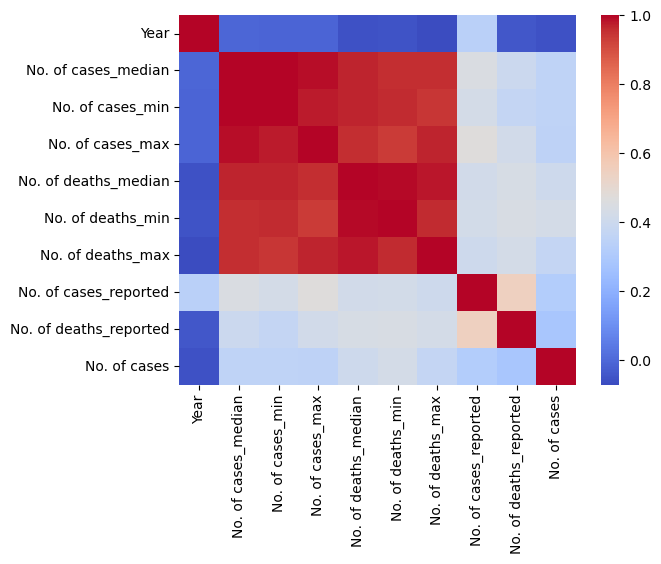

In [83]:
#lets visualize the correlation matrix using seaborn
sns.heatmap(numeric_columns.corr(),cmap='coolwarm')

In [114]:
# Target variable
y = dataframe['malaria_severity']

In [115]:
# Features: drop non-numeric or target/leaky columns
features = dataframe.drop(columns=['Country', 'WHO Region', 'malaria_severity', 'No. of cases'])

In [116]:
# Select numeric features only
X = features.select_dtypes(include=['int64', 'float64'])

In [117]:
# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [118]:
# Split data
# train test ratio 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

In [123]:
X_train.shape

(275, 9)

In [127]:
y_train.shape

(275,)

In [131]:
X_test.shape

(69, 9)

In [132]:
y_test.shape

(69,)

In [133]:
# Scale features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [134]:
X_train_scaled[0,0]

0.4285714285714448

In [135]:
X_train.iloc[0,0]

2013

In [129]:
# Train RandomForest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [136]:
# Predict & evaluate
y_pred = clf.predict(X_test_scaled)

In [137]:
y_pred[0:3]

array([0, 2, 1])

In [138]:
y_test[0:3]

array([0, 2, 1])

In [139]:
classes

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [ ]:
#Evaluating the model
#The following metrics will be used

#-accuracy
#-f1 score
#-recall
#-precision
#-confusion matrix

In [148]:
# import the metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score

In [141]:
#balanced accuracy
balanced_accuracy=balanced_accuracy_score(y_test,y_pred)
balanced_accuracy=round(balanced_accuracy,2)
print('balanced accuracy:',balanced_accuracy)

balanced accuracy: 0.94


In [142]:
#f1score
f1score=f1_score(y_test,y_pred,average='weighted')
f1score=round(f1score,2)
print('f1score:',f1score)

f1score: 0.94


In [143]:
#precision 
precision=precision_score(y_test,y_pred,average='weighted')
precision=round(precision,2)
print('precision:',precision)

precision: 0.94


In [166]:
#recall
recall=recall_score(y_test,y_pred,average='weighted')
recall=round(recall,2)
print('recall:',recall)

recall: 0.94


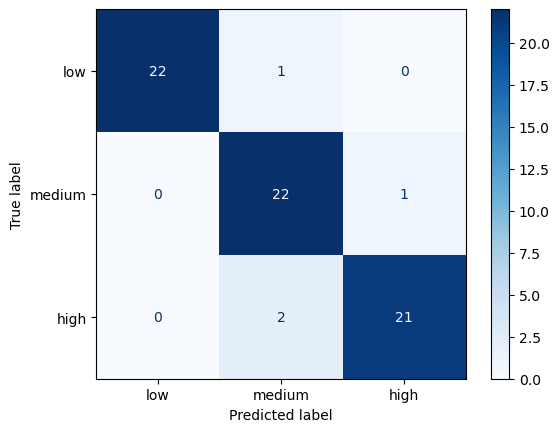

In [168]:
from sklearn.preprocessing import LabelEncoder

# Recreate or reuse the label encoder with correct class names
le = LabelEncoder()
le.fit(["low", "medium", "high"])

# Inverse transform numeric predictions to string labels
y_test_named = le.inverse_transform(y_test)
y_pred_named = le.inverse_transform(y_pred)

# Define label order for the plot
labels = le.classes_  # ['high', 'low', 'medium'] — depends on how LabelEncoder sorted them

# Optional: enforce desired order manually
labels = ["low", "medium", "high"]

# Generate confusion matrix
cm = confusion_matrix(y_test_named, y_pred_named, labels=labels)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues")
